<a href="https://colab.research.google.com/github/HMMK99/Deep_Learning_Bootcamp/blob/master/DPhi(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

##**DOWNLOADING** **THE DATA**

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='176E-pLhoxTgWsJ3MeoJQV_GXczIA6g8D',
                                    dest_path='/content/animals.zip',
                                    unzip=True)

##**LOADING LIBIRARIES**

In [ ]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
class_names = ['elefante_train','farfalla_train', 'mucca_train', 'pecora_train', 'scoiattolo_train']
IMG_SIZE = 224


## **LOADING** **THE** **DATA**

In [ ]:
def get_data_from_folder(path):
  data = []
  for class_name in class_names: # iterate through classes
    try:
      files = glob.glob(path+"/"+class_name+"/*") # get files in each folder(class)
      for f in files:
        img = cv2.imread(f) #read the image
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE)) #resize the image
        data.append([np.array(img),class_names.index(class_name)]) #Append images and corresponding labels to data
    except:
      pass
  np.random.shuffle(data)
  return data

In [ ]:
training_data = get_data_from_folder('/content/animal_dataset_intermediate/train')

In [ ]:
len(training_data)


6932

In [ ]:

y = []
for i in training_data:
  y.append(i[1])
y = y[:4500]


[4, 1, 1, 4, 4, 3, 4, 4, 4, 2]

In [ ]:
### the colab RAM crushes if i exceed this amount
x = []
for i in training_data:
  x.append(i[0])
x = x[:4500]

In [ ]:
#from tensorflow.keras.utils import to_categorical
#y = to_categorical(y, 5)

In [ ]:
import tensorflow as tf


In [ ]:
def get_test_data_from_folder(path):
  data = []
  files = glob.glob(path+"/*") # get files in each folder(class)
  for f in files:
    img = cv2.imread(f) #read the image
    img = cv2.resize(img,(IMG_SIZE,IMG_SIZE)) #resize the image
    data.append([np.array(img)])
  data = np.array(data)
  return data

In [ ]:
testing_data = get_test_data_from_folder('/content/animal_dataset_intermediate/test')
len(testing_data[0][0][0][0])

3

In [ ]:
test = []
for i in testing_data:
  test.append(i[0])
test = np.array(test)

In [ ]:
#from PIL import Image, ImageOps

In [ ]:
#leo = ImageOps.grayscale(Image.open('/content/animal_dataset_intermediate/train/elefante_train/OIP---LeldVL441fx5S66TGgVQAAAA.jpeg'))
#leo_arr = np.array(leo)
#plt.imshow(leo_arr);


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard
from datetime import datetime
from tensorflow.keras import regularizers

logdir = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=logdir)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
##### Can't do data augmentation due to Storage limitation
#data_augmentation = tf.keras.Sequential(
 #   [
    #    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
   #     tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
  #      tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
 #   ]
#)

## **MODEL MULTI-LAYAER**

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255))
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(5,activation='softmax'))


##**OPTIMISER**

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


##**TENSORBOARD & TRAINING**

In [ ]:
path = "logs\\fit\\" + datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=path, histogram_freq=1)
history = model.fit(((np.array(x).reshape(4500, 224*224*3))/255), np.array(y),
                    batch_size=32, 
                    validation_split=0.2, epochs=20,
                    callbacks = [tensorboard_callback],
                    verbose=1)


Epoch 1/20
  1/113 [..............................] - ETA: 0s - loss: 1.6096 - accuracy: 0.1562WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
113/113 [==============================] - 54s 479ms/step - loss: 1.4949 - accuracy: 0.3247 - val_loss: 1.3989 - val_accuracy: 0.4067
Epoch 2/20
113/113 [==============================] - 53s 466ms/step - loss: 1.3957 - accuracy: 0.3769 - val_loss: 1.3666 - val_accuracy: 0.3867
Epoch 3/20
113/113 [==============================] - 52s 465ms/step - loss: 1.3194 - accuracy: 0.4378 - val_loss: 1.2736 - val_accuracy: 0.4778
Epoch 4/20
113/113 [==============================] - 52s 464ms/step - loss: 1.2701 - accuracy: 0.4603 - val_loss: 1.2884 - val_accuracy: 0.4756
Epoch 5/20
113/113 [==============================] - 53s 

In [ ]:
%tensorboard --logdir logs/fit


UsageError: Line magic function `%tensorboard` not found.


##**MODEL** **CNN**

In [ ]:
# define input shape
INPUT_SHAPE = (224, 224, 3)

# define sequential model
model = tf.keras.models.Sequential()
# define conv-pool layers - set 1
model.add(tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), 
                                activation='relu', padding='valid', input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# define conv-pool layers - set 2
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), 
                                activation='relu', padding='valid', input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=24, kernel_size=(3, 3), strides=(1, 1), 
                                activation='relu', padding='valid', input_shape=INPUT_SHAPE))# define conv-pool layers - set 1

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), 
                                activation='relu', padding='valid', input_shape=INPUT_SHAPE))# define conv-pool layers - set 2

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(filters=48, kernel_size=(3, 3), strides=(1, 1), 
                                activation='relu', padding='valid', input_shape=INPUT_SHAPE))# define conv-pool layers - set 2

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())# add flatten layer

# add dense layers with some dropout
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(128, activation='relu',kernel_regularizer ="l2"))
model.add(tf.keras.layers.Dropout(rate=0.5))

# add output layer
model.add(tf.keras.layers.Dense(5, activation='softmax'))

# compile model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# view model layers
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 16)      1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 24)        3480      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 24)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        6

In [ ]:
EPOCHS = 40
x = np.array(x) / 255.
y = np.array(y)
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2,
                                               restore_best_weights=True,
                                               verbose=1)


In [ ]:
#EPOCHS = 10


In [ ]:
history = model.fit(x, y,
                    batch_size=32, 
                    validation_split=0.2, epochs=EPOCHS,callbacks=[tensorboard_callback, es],
                    verbose=1)


Epoch 1/40
  1/113 [..............................] - ETA: 0s - loss: 3.3271 - accuracy: 0.2188WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
113/113 [==============================] - 91s 804ms/step - loss: 2.2227 - accuracy: 0.3450 - val_loss: 1.4340 - val_accuracy: 0.4956
Epoch 2/40
113/113 [==============================] - 89s 790ms/step - loss: 1.3764 - accuracy: 0.4822 - val_loss: 1.1526 - val_accuracy: 0.5967
Epoch 3/40
113/113 [==============================] - 90s 793ms/step - loss: 1.1385 - accuracy: 0.5911 - val_loss: 0.9657 - val_accuracy: 0.6300
Epoch 4/40
113/113 [==============================] - 90s 795ms/step - loss: 1.0083 - accuracy: 0.6375 - val_loss: 0.9489 - val_accuracy: 0.6456
Epoch 5/40
113/113 [==============================] - 90s 

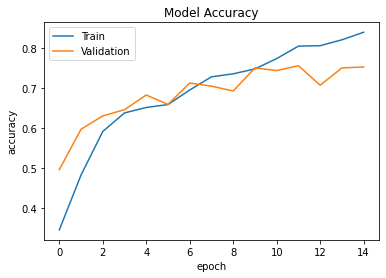

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
x = 0

In [ ]:
#target = model.predict(test.reshape(910, 224*224*3))
target = model.predict(test)


In [ ]:
targ = np.argmax(target, axis = 1).tolist()

In [ ]:
z = 0
for i in targ:
  if i == 0:
    targ[z] = 'elefante'
  if i == 1:
    targ[z] = 'farfalla'
  if i == 2:
    targ[z] = 'mucca'
  if i == 3:
    targ[z] = 'pecora'
  if i == 4:
    targ[z] = 'scoiattolo'
  z = z + 1

In [ ]:
import pandas as pd

In [ ]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(targ) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
#res.index = test.shape[0] # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('dphi2results.csv')         
files.download('dphi2results.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>